<a href="https://colab.research.google.com/github/GislaineGomes/deco_morse/blob/main/_analise_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Mastercard_stock_history.csv')
df2 = pd.read_csv('/content/Mastercard_stock_info.csv')

df.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [ ]:
df2.head()


,zip,10577
0,sector,Financial Services
1,fullTimeEmployees,21000
2,longBusinessSummary,"Mastercard Incorporated, a technology company,..."
3,city,Purchase
4,phone,914 249 2000


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df2)

https://docs.google.com/spreadsheets/d/1-_HGZS9UFl6bMt4OUo-dMsSUXMC_muQydgc0m5vm5FE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Entendendo as metricas e dimensões desse google Sheets


In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

**Quantidade de linhas que eu tenho no meu Data set

In [ ]:
# prompt: Quantidade de linhas que eu tenho no meu Data set

print(f"Number of rows in df: {len(df)}")
print(f"Number of rows in df2: {len(df2)}")

O dataset tem 3872 linhas.


**Preparação dos Dados** - Removendo valores Nulos


In [ ]:
df.isnull().sum()
df = df.dropna()
df = df.dropna()

**Conhecendo o arquivo**


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   10577   117 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


***Entendendo o Minimo, Maximo e Mediana***

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [ ]:
df2.describe()

,zip,10577
count,150,117
unique,150,105
top,sector,1
freq,1,2


***Começando analisar os dados***

In [ ]:
df[cat_cols].nunique()

,0
Date,3872


In [ ]:
df2[cat_cols].nunique()

,0


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

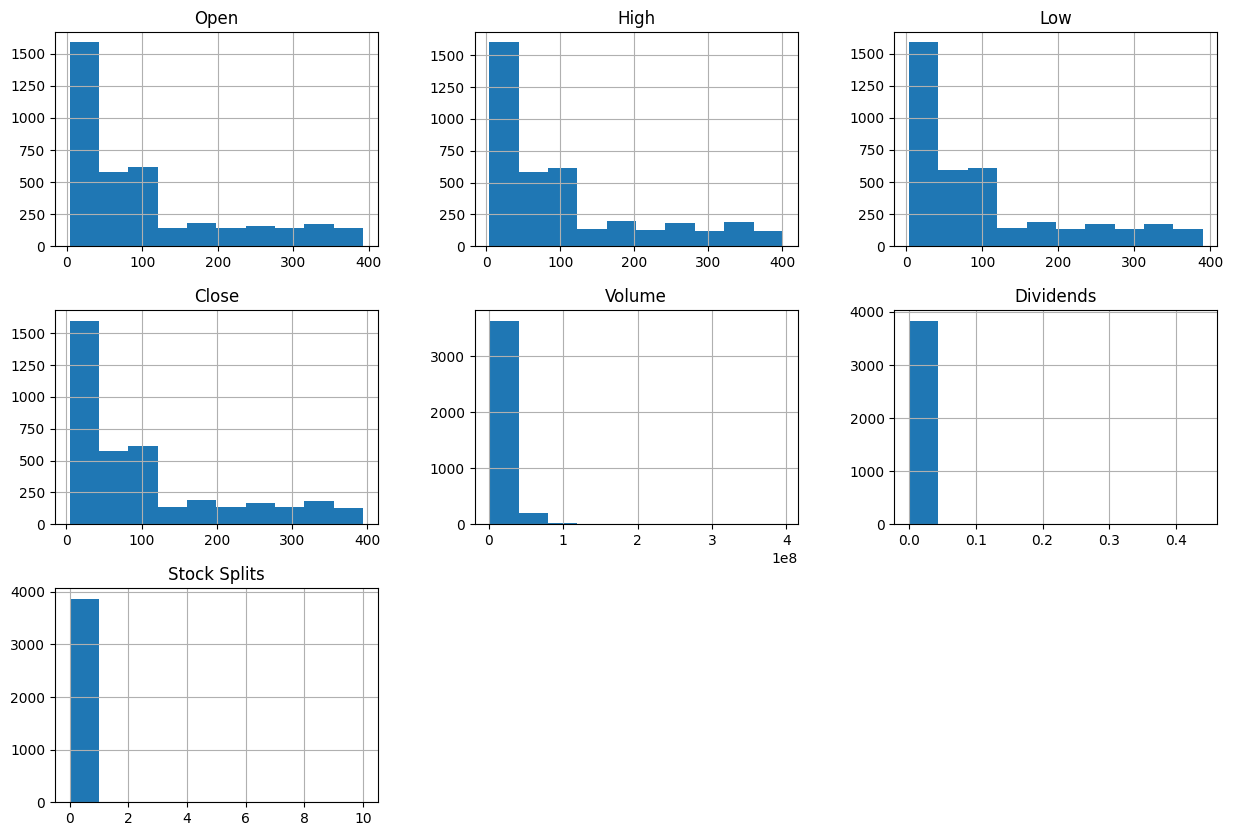

In [ ]:
df.hist(figsize=(15, 10))

Os graficos, mostra o volume de ações da Mastercard negociadas diariamente. Há um aumento significativo no volume no início de 2009. Caso contrário, o volume geralmente diminuiu ao longo do tempo.

**Como as ações da mastercard se comporta ao longo do tempo. Com o retorno financeiro. **

**Criando um modelo , neste campo vamos entender o dataset do modelo. **

In [14]:
train = pd.read_csv("/content/Mastercard_stock_history.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 3872
         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [ ]:
train = pd.read_csv("/content/Mastercard_stock_info.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 150
                   zip                                              10577
0               sector                                 Financial Services
1    fullTimeEmployees                                              21000
2  longBusinessSummary  Mastercard Incorporated, a technology company,...
3                 city                                           Purchase
4                phone                                       914 249 2000


In [ ]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [9]:
acoes = ['MA','AAPL','GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

**Criando o modelo

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = df['Volume']
y = df.drop('Volume', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0      395343000
1      103044000
2       49898000
3       30002000
4       62344000
         ...    
395     44661000
396     41105000
397     50920000
398     10526000
399     12477000
Name: Volume, Length: 400, dtype: int64
X_teste:
 400     20166000
401      9901000
402     13115000
403     20156000
404     28994000
          ...   
3867     4724100
3868     3712000
3869     3209200
3870     2336700
3871     2766800
Name: Volume, Length: 3472, dtype: int64
y_treino:
            Date       Open       High        Low      Close  Dividends  \
0    2006-05-25   3.748967   4.283869   3.739664   4.279217        0.0   
1    2006-05-26   4.307126   4.348058   4.103398   4.179680        0.0   
2    2006-05-30   4.183400   4.184330   3.986184   4.093164        0.0   
3    2006-05-31   4.125723   4.219679   4.125723   4.180608        0.0   
4    2006-06-01   4.179678   4.474572   4.176887   4.419686        0.0   
..          ...        ...        ...        ...        ...        ..

In [19]:
x = df['High']
y = df.drop('High', axis=1)
X_treino, X_teste = x[0:1000], x[1000:]
y_treino, y_teste = y[0:1000], y[1000:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0       4.283869
1       4.348058
2       4.184330
3       4.219679
4       4.474572
         ...    
995    22.253135
996    21.439794
997    22.262554
998    22.611262
999    20.735785
Name: High, Length: 1000, dtype: float64
X_teste:
 1000     20.420059
1001     20.226862
1002     20.097741
1003     19.790507
1004     20.483205
           ...    
3867    348.130138
3868    348.439763
3869    357.899994
3870    360.369995
3871    354.880005
Name: High, Length: 2872, dtype: float64
y_treino:
            Date       Open        Low      Close     Volume  Dividends  \
0    2006-05-25   3.748967   3.739664   4.279217  395343000        0.0   
1    2006-05-26   4.307126   4.103398   4.179680  103044000        0.0   
2    2006-05-30   4.183400   3.986184   4.093164   49898000        0.0   
3    2006-05-31   4.125723   4.125723   4.180608   30002000        0.0   
4    2006-06-01   4.179678   4.176887   4.419686   62344000        0.0   
..          ...        ...        ...        .

In [21]:
x = df['Close']
y = df.drop('Close', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0       4.279217
1       4.179680
2       4.093164
3       4.180608
4       4.419686
         ...    
395    19.860258
396    19.337421
397    19.861197
398    19.839689
399    19.592766
Name: Close, Length: 400, dtype: float64
X_teste:
 400      19.644203
401      19.641399
402      20.127760
403      20.079121
404      19.839689
           ...    
3867    342.776886
3868    348.250000
3869    353.910004
3870    354.959991
3871    347.149994
Name: Close, Length: 3472, dtype: float64
y_treino:
            Date       Open       High        Low     Volume  Dividends  \
0    2006-05-25   3.748967   4.283869   3.739664  395343000        0.0   
1    2006-05-26   4.307126   4.348058   4.103398  103044000        0.0   
2    2006-05-30   4.183400   4.184330   3.986184   49898000        0.0   
3    2006-05-31   4.125723   4.219679   4.125723   30002000        0.0   
4    2006-06-01   4.179678   4.474572   4.176887   62344000        0.0   
..          ...        ...        ...        

Quantidade de vezes que vamos testar o modelo

In [22]:
X_teste.shape

(3472,)

In [23]:
X_treino.shape

(400,)

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout



In [25]:
model=Sequential()
model.add(LSTM(units=3250,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 400, 3250)


In [28]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1000,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,449 (533.00 KB)

 Trainable params: 136,449 (533.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
print(X_treino.shape)
print(X_teste.shape)

(400,)
(3472,)


In [31]:
import matplotlib.pyplot as plt

history = model.fit(X_treino, y_treino, epochs=50, batch_size=32, validation_data=(X_teste, y_teste), verbose=1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

ValueError: could not convert string to float: '2006-05-25'

**Quantidade de vezes que o modelo esta sendo aplicado e com pequenas variaçoes nas açoes

In [32]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
X = np.random.randn(100, 1000)
y = np.random.randn(100)

In [36]:
model = Sequential()
model.add(Dense(64, input_dim=1000, activation='relu'))
model.add(Dense(1))

In [37]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
100/100 - 1s - 10ms/step - loss: 2.7856
Epoch 2/10
100/100 - 0s - 3ms/step - loss: 11.2907
Epoch 3/10
100/100 - 1s - 6ms/step - loss: 3.5290
Epoch 4/10
100/100 - 1s - 6ms/step - loss: 0.5449
Epoch 5/10
100/100 - 0s - 3ms/step - loss: 0.2126
Epoch 6/10
100/100 - 1s - 6ms/step - loss: 0.2673
Epoch 7/10
100/100 - 0s - 2ms/step - loss: 0.4732
Epoch 8/10
100/100 - 0s - 3ms/step - loss: 0.4872
Epoch 9/10
100/100 - 0s - 3ms/step - loss: 0.6245
Epoch 10/10
100/100 - 0s - 3ms/step - loss: 0.3508


***
Importação do Arima .

Aplicaçao da arquitetura do arima
O modelo ARIMA (AutoRegressive Integrated Moving Average) é uma abordagem clássica para modelar e prever séries temporais. Ele é amplamente usado para séries estacionárias (ou séries que podem ser transformadas em estacionárias) e combina três componentes principais:

AR (AutoRegressive): Parte autorregressiva que usa a relação entre uma observação atual e suas observações passadas.
I (Integrated): Parte de integração, que aplica diferenciação nas observações para tornar a série estacionária.
MA (Moving Average): Parte de média móvel que utiliza os erros passados (resíduos) para modelar a série.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Dependencia temporal e classificação:


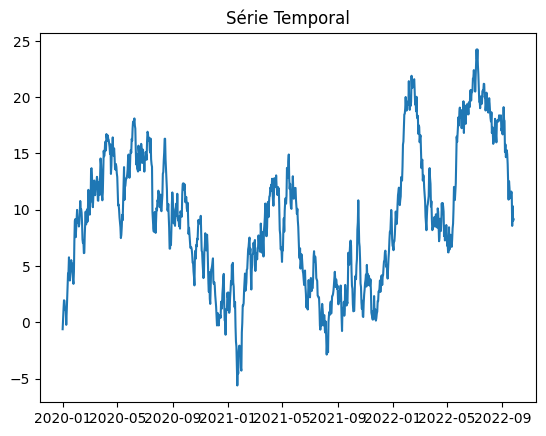

In [40]:
data = pd.Series(np.random.randn(1000).cumsum())
data.index = pd.date_range(start="2020-01-01", periods=len(data), freq="D")

# Visualizar a série
plt.plot(data)
plt.title("Série Temporal")
plt.show()

teste de Dickey-Fuller Aumentado (ADF) para verificar se a série é estacionária.

In [41]:
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.8846007399627713
p-value: 0.04716825039628354


In [42]:
model = ARIMA(data, order=(1, 5, 2))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 5, 2)   Log Likelihood               -2032.985
Date:                Tue, 19 Nov 2024   AIC                           4073.971
Time:                        01:10:30   BIC                           4093.582
Sample:                    01-01-2020   HQIC                          4081.426
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6444      0.025    -25.767      0.000      -0.693      -0.595
ma.L1         -1.9985      0.557     -3.585      0.000      -3.091      -0.906
ma.L2          0.9995      0.558      1.791      0.0

Visualizando os dados com uma maior precisão

Previsões futuras: 2022-09-27     7.811623
2022-09-28     6.878318
2022-09-29     5.138738
2022-09-30     3.372017
2022-10-01     1.072885
2022-10-02    -1.436856
2022-10-03    -4.368882
2022-10-04    -7.591662
2022-10-05   -11.195360
2022-10-06   -15.127834
Freq: D, Name: predicted_mean, dtype: float64


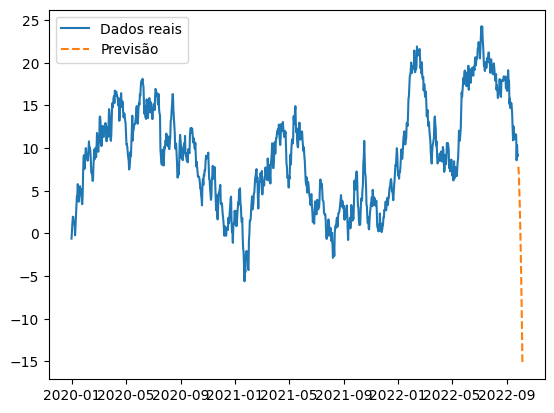

In [43]:
forecast = model_fit.forecast(steps=10)
print("Previsões futuras:", forecast)

# Visualizar previsões
plt.plot(data, label="Dados reais")
plt.plot(forecast, label="Previsão", linestyle="--")
plt.legend()
plt.show()

 Prophet é uma biblioteca desenvolvida pelo Facebook para modelar e prever séries temporais. Ele é especialmente útil para prever dados que apresentam padrões sazonais, tendências de longo prazo e outliers, além de lidar bem com lacunas e alterações nos dados.

Principais características do Prophet
Fácil de usar, mesmo para quem não tem muita experiência em modelagem de séries temporais.
Funciona bem com dados que têm padrões sazonais diários, semanais ou anuais.
Permite a inclusão de variáveis externas (regressoras adicionais).
Tolerante a valores ausentes ou outliers nos dados.

In [44]:


pip install prophet

In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Criando uma serie temporal , olhando para os ultimos 365 dias a partir da data

In [47]:
# Criar uma série temporal de exemplo
data = pd.DataFrame({
    'ds': pd.date_range(start="2023-01-01", periods=365, freq='D'),  # Datas
    'y': [i + (5 * (i % 30)) + (10 if i % 1000 == 0 else 0) for i in range(365)]  # Valores simulados
})

# Visualizar os dados
data.head()

,ds,y
0,2023-01-01,10
1,2023-01-02,6
2,2023-01-03,12
3,2023-01-04,18
4,2023-01-05,24


Criando o modelo

In [48]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6udqd31q/9sqxop0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6udqd31q/_k8583kz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56022', 'data', 'file=/tmp/tmp6udqd31q/9sqxop0w.json', 'init=/tmp/tmp6udqd31q/_k8583kz.json', 'output', 'file=/tmp/tmp6udqd31q/prophet_modelv_9vnq10/prophet_model-20241119011126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Criando um data frame com datas Futuras , olhando para os 30 dias para frente com o maior numero de precisão

In [49]:
# Criar um DataFrame com datas futuras
future = model.make_future_dataframe(periods=50)  # Prever 30 dias à frente
forecast = model.predict(future)

# Visualizar as previsões
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()  # yhat = previsão

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01,68.966538,17.802528,128.394312
1,2023-01-02,70.077865,15.958154,127.474829
2,2023-01-03,70.312182,16.044376,125.119442
3,2023-01-04,70.546494,12.694532,120.852013
4,2023-01-05,70.780814,13.215537,125.574551


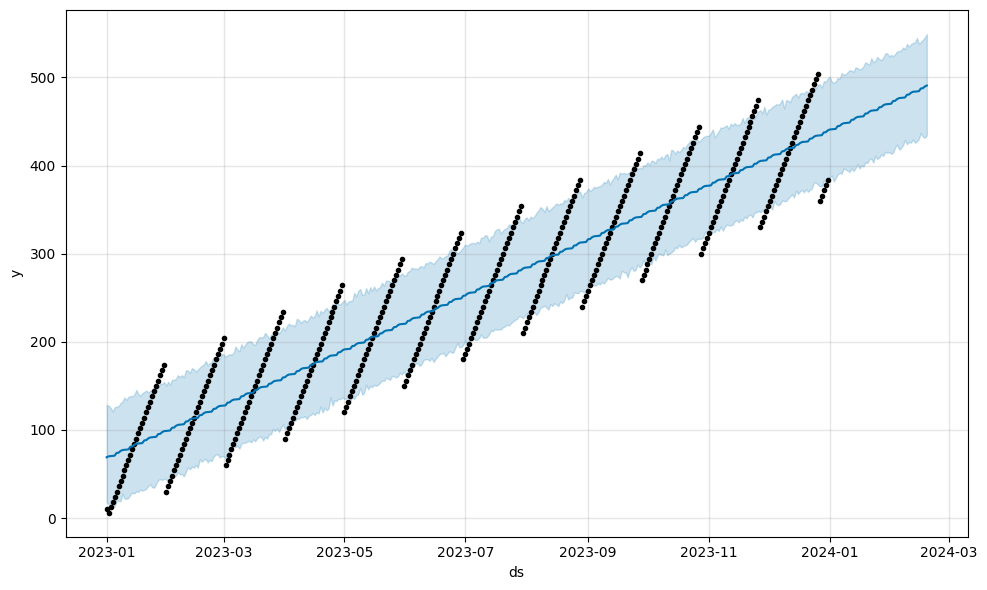

In [50]:
fig = model.plot(forecast)
plt.show()

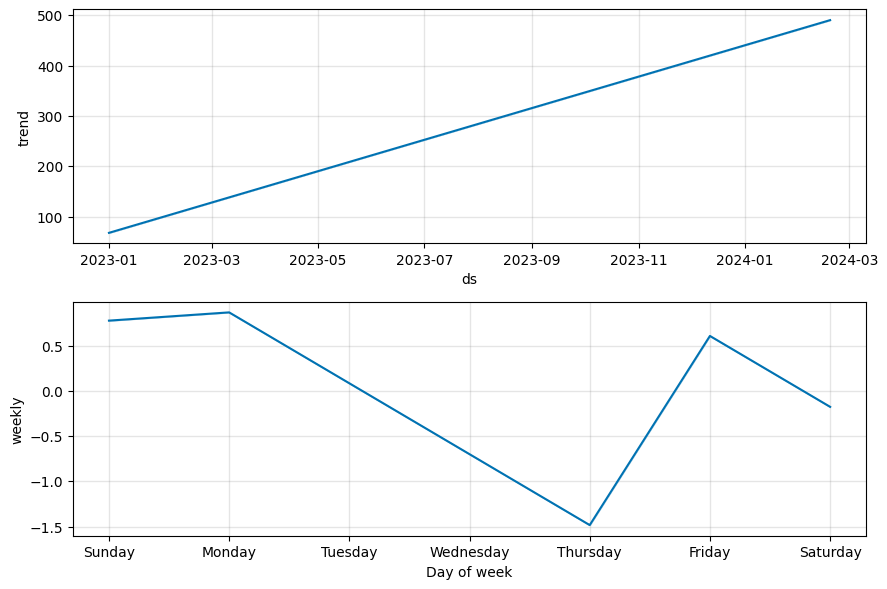

In [51]:
fig_components = model.plot_components(forecast)
plt.show()

Benefícios do Prophet
Fácil de configurar e interpretar: Requer menos ajuste em comparação com ARIMA.
Automatizado: Detecta tendências e sazonalidades automaticamente.
Personalizável: Permite ajustar sazonalidades, feriados e variáveis externas.

In [52]:
from prophet.make_holidays import make_holidays_df

# Criar um conjunto de feriados
holidays = pd.DataFrame({
    'holiday': 'feriado_importante',
    'ds': pd.to_datetime(['2020-02-14', '2023-12-25']),
    'lower_window': 0,
    'upper_window': 1
})

model = Prophet(holidays=holidays)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6udqd31q/jnphj8v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6udqd31q/ee7u28ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33779', 'data', 'file=/tmp/tmp6udqd31q/jnphj8v0.json', 'init=/tmp/tmp6udqd31q/ee7u28ne.json', 'output', 'file=/tmp/tmp6udqd31q/prophet_modelygwx0sc2/prophet_model-20241119011150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
